# Hydrogeodesy: Monitoring surface waters from space
### Exercise 1: From measured ranges to water level & pre-processed inland altimetry products

Daniel Scherer, DGFI-TUM  
Wintersemester 2024/25

##### **Contents**
1. Height estimation and retracker comparison
2. Water level time series
3. Qaulity Assessment

In this Exercise you learn how to estimate water levels from classical nadir satellite altimetry data.<br>
We will use the Envisat, Sentinel-3A/B, and Jason/Sentinel-6A missions to estimate water levels at the Sam Rayburn Reservoir in Texas, USA.<br>
The data is pre-processed and provided in the `data` folder.

##### **Study Area: Sam Rayburn Reservoir (Texas, USA)**
The Sam Rayburn Reservoir is located in Texas, USA.<br>
It is crossed by the Envisat, Sentinel-3A/B, and Jason/Sentinel-6A missions, so we can compare the quality of the different missions over decades.<br>
There is also an in-situ water level gauge station at the reservoir, which we can use to validate our estimates.<br>
The water level varies by  approx. 7 m (!), so we can expect to see a strong signal in the satellite derived water level timeseries.
<!-- ![AOI](Map.png)   -->
<img src="Sam Rayburn.png" alt="Map" style="width: 300mm;"/>

*Figure 1: Sam Rayburn Reservoir and the intersecting **nominal** groundtracks of the Envisat, Sentinel-3A/B, and Jason-3 Misssions.<br>**Note that all Jason and the Sentinel-6A missions share the same orbit!***  

### Excercise

First, we will import the necessary Python libraries and load the data.

In [2]:
import pandas as pd # Pandas is a powerful tool for data analysis
import geopandas as gpd # Geopandas is an extension to pandas that makes working with geospatial data easier
import matplotlib.pyplot as plt # Matplotlib is a standard plotting library in Python
import contextily as cx # Contextily is a package to add basemaps to your plots
import cartopy.crs as ccrs # Cartopy is a package for geospatial data visualization
from matplotlib_scalebar.scalebar import ScaleBar # Scalebar is a package to add scalebars to your plots

The satellite altimetry data for this exercise is provided in the *raw_data.gpkg* file.

Load the data and take a look at its structure:

In [3]:
data = gpd.read_file('data/SamRayburn/raw_data.gpkg')
data

datetime        glon       glat     mission  cycle_nr  \
0      2002-07-12 03:56:07  265.799777  31.193353     envisat         7   
1      2002-07-12 03:56:07  265.798870  31.196638     envisat         7   
2      2002-07-12 03:56:07  265.797965  31.199923     envisat         7   
3      2002-07-12 03:56:07  265.797059  31.203208     envisat         7   
4      2002-07-12 03:56:08  265.796153  31.206493     envisat         7   
...                    ...         ...        ...         ...       ...   
122578 2024-09-07 10:52:28  265.943148  31.422541  sentinel6a       141   
122579 2024-09-07 10:52:28  265.944428  31.424906  sentinel6a       141   
122580 2024-09-07 10:52:28  265.945708  31.427272  sentinel6a       141   
122581 2024-09-07 10:52:28  265.946989  31.429637  sentinel6a       141   
122582 2024-09-07 10:52:28  265.948270  31.432003  sentinel6a       141   

        pass_nr         hsat        uralt  ionos     wtrop     dtrop  \
0           695   787835.926   787815.244 -0.041 -0.288205 -2.296744   
1           695   787836.436   787816.562 -0.041 -0.288324 -2.296472   
2           695   787836.947   787817.599 -0.041 -0.288442 -2.296200   
3           695   787837.458   787818.310 -0.041 -0.288704 -2.295657   
4           695   787837.969   787819.323 -0.041 -0.288966 -2.295113   
...         ...          ...          ...    ...       ...       ...   
122578       41  1344310.492  1344315.028 -0.038 -0.222078 -2.283660   
122579       41  1344311.132  1344315.669 -0.038 -0.222320 -2.283123   
122580       41  1344311.771  1344316.303 -0.038 -0.222563 -2.282585   
122581       41  1344312.411  1344316.944 -0.038 -0.222694 -2.282319   
122582       41  1344313.050  1344317.578 -0.038 -0.222937 -2.281781   

           ptide     etide    geoh  ralt_ocean    ralt_ice      ralt_imth  \
0      -0.002368 -0.127037 -28.382  787816.248  787817.168  787817.376485   
1      -0.002368 -0.127039 -28.376  787816.840  787817.122  787817.327818   
2      -0.002368 -0.127041 -28.370  787817.274  787817.702  787817.898995   
3      -0.002368 -0.127043 -28.363  787818.379  787818.472  787818.823478   
4      -0.002368 -0.127044 -28.357  787819.018  787819.400            NaN   
...          ...       ...     ...         ...         ...            ...   
122578 -0.000684  0.058500 -27.828         NaN         NaN            NaN   
122579 -0.000684  0.058495 -27.821         NaN         NaN            NaN   
122580 -0.000684  0.058489 -27.814         NaN         NaN            NaN   
122581 -0.000684  0.058484 -27.807         NaN         NaN            NaN   
122582 -0.000684  0.058478 -27.800         NaN         NaN            NaN   

         oerr                    geometry  
0       0.524  POINT (265.79978 31.19335)  
1       0.524  POINT (265.79887 31.19664)  
2       0.524  POINT (265.79796 31.19992)  
3       0.524  POINT (265.79706 31.20321)  
4       0.000  POINT (265.79615 31.20649)  
...       ...                         ...  
122578  0.000  POINT (265.94315 31.42254)  
122579  0.000  POINT (265.94443 31.42491)  
122580  0.000  POINT (265.94571 31.42727)  
122581  0.000  POINT (265.94699 31.42964)  
122582  0.000    POINT (265.94827 31.432)  

[122583 rows x 19 columns]

The data is now stored in a **geopandas dataframe** with the following columns:

| Column Name | Description |
| -------- | ------- |
| datetime | Date and time of the measurement |
| glon | Longitude of the measurement |
| glat | Latitude of the measurement |
| misssion | Satellite mission name |
| cycle_nr | Cycle number |
| pass_nr | Pass number |
| hsat | Satellite height above the ellipsoid |
| uralt | Uncorrected range to the satellite |
| ionos| Ionospheric correction |
| wtrop | Wet tropospheric correction |
| dtrop | Dry tropospheric correction |
| ptide | Ocean tide correction |
| etide | Solid earth tide correction |
| geoh | Geoid height |
| ralt_ocean | Estimated range by the ocean retracker |
| ralt_ice | Estimated range by the ice retracker |
| ralt_imth | Estimated range by the improved threshold retracker |
| oerr | Radial Orbit Errors (Intermission biases) |
| geometry | Coordinates of the measurement as python shypely Point object |

The columns can be accessed using the following syntax:

```python
# Accessing the datetime column
data.datetime
```
or
```python
data['datetime']
```
which returns a vector:
```
0        2002-07-12 03:56:07
1        2002-07-12 03:56:07
2        2002-07-12 03:56:07
3        2002-07-12 03:56:07
4        2002-07-12 03:56:08
                 ...       
```

with the following line you can display statistics of the data:

```python
data.describe()
```

**Which geophysical correction is most significant?**

In [4]:
data.describe().round(3)

datetime        glon        glat    cycle_nr  \
count                      122583  122583.000  122583.000  122583.000   
mean   2016-08-01 14:04:02.547000     265.829      31.245     111.562   
min           2002-07-12 03:56:06     265.651      31.057       1.000   
25%           2012-03-23 04:07:00     265.776      31.150      49.000   
50%           2016-12-12 11:52:03     265.827      31.243      93.000   
75%           2021-05-06 19:53:43     265.887      31.340     166.000   
max           2024-10-01 16:38:52     265.956      31.434     303.000   
std                           NaN       0.068       0.109      77.282   

          pass_nr         hsat        uralt       ionos       wtrop  \
count  122583.000   122583.000   122582.000  122583.000  122583.000   
mean      111.017  1256102.118  1256077.502      -0.036      -0.177   
min        41.000   787711.058   787693.799      -0.125      -0.377   
25%        41.000  1343912.292  1343881.460      -0.043      -0.248   
50%        41.000  1344184.545  1344169.761      -0.029      -0.183   
75%        41.000  1344376.534  1344355.721      -0.021      -0.099   
max       695.000  1344863.227  1344805.980      -0.011      -0.018   
std       180.064   201068.404   201070.388       0.021       0.087   

            dtrop       ptide       etide        geoh   ralt_ocean  \
count  122583.000  122583.000  122583.000  122583.000    22906.000   
mean       -2.300       0.001       0.004     -28.243   899322.473   
min        -2.357      -0.006      -0.193     -28.525   786248.433   
25%        -2.307      -0.001      -0.077     -28.446   787839.919   
50%        -2.298       0.001      -0.017     -28.286   805952.540   
75%        -2.291       0.003       0.084     -28.063   806417.972   
max        -2.250       0.006       0.309     -27.795  1344787.804   
std         0.013       0.003       0.107       0.215   213361.384   

          ralt_ice    ralt_imth        oerr  
count   118430.000    25438.000  122583.000  
mean   1256112.103  1279892.187       0.008  
min     787695.384   787696.052      -0.036  
25%    1343876.673  1343929.783       0.000  
50%    1344153.219  1344163.914       0.000  
75%    1344351.993  1344340.378       0.000  
max    1344809.640  1344788.724       0.524  
std     201098.463   176523.427       0.058

The geopandas data can also be plotted directly:

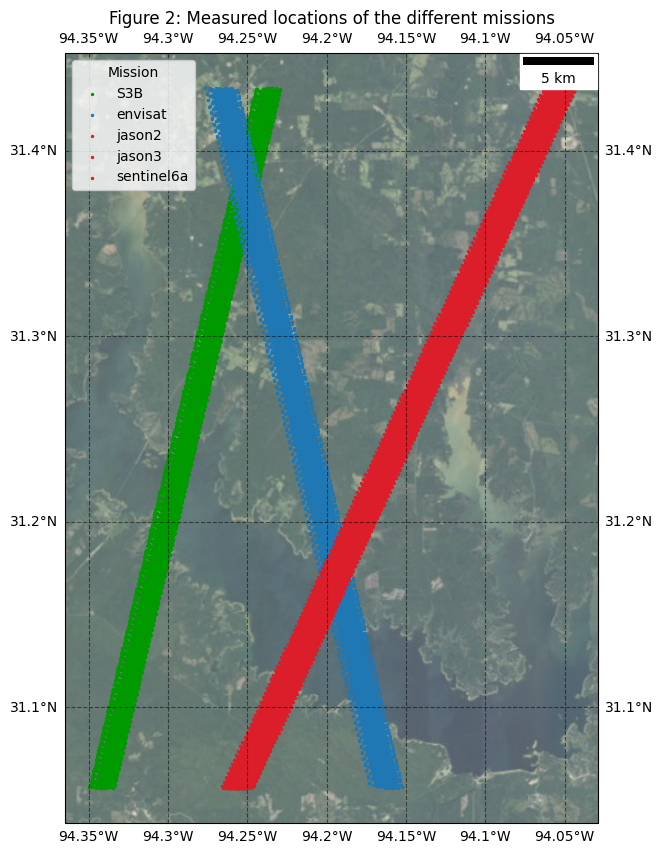

In [5]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.epsg(3857)})
colors = {'S3B':'#009900', 'envisat':'#1f78b4'}
for name, group in data.to_crs(3857).groupby('mission'):
    group.plot(ax=ax, markersize=2, label=name, color=colors.get(name, '#db1e2a'))

cx.add_basemap(plt.gca(), source=cx.providers.USGS.USImagery, alpha=0.75, crs=3857,attribution='')

gl = ax.gridlines(draw_labels=True, color='black', alpha=0.5, linestyle='--')

plt.legend(title='Mission', loc='upper left')
ax.add_artist(ScaleBar(1))
plt.xticks([])
plt.yticks([])
plt.title('Figure 2: Measured locations of the different missions')
plt.show()

Note, how the actual data deviate from the nominal groundtrack (Figure 1) as the satellites drift over time.

#### 1.1 Height estimation and retracker comparison

New columns can be added to the dataframe using the following syntax:

```python
# Adding a new column to the dataframe
data['new_column'] = new_values
```

The columns are treated as vectors, so you can perform mathematical operations on them directly:

```python
# Adding two columns together
data['new_column'] = data['column1'] - data['column2']
```
| Index | new_column |   =   | column1  |   -   | column2  |
|-------|------------|-------|----------|-------|----------|
| 0     | -2.0       |       | 3.0      |       |  1.0     |
| 1     |  0.0       |       | 2.0      |       |  2.0     |
| 2     |  NaN       |       | 1.0      |       |  NaN     |
| 3     |  6.0       |       | -2.0     |       |  4.0     |
| 4     |  NaN       |       | NaN      |       |  5.0     |

Note, that they must use a common index.

**Calculate the Water Surface Elevation (WSE) using the following formula:**

$$
h = hsat - (R + corrections)
$$

with
- $h$: resulting water height (WSE)
- $R$: Range from the retracker algorithm
- $corrections$: geophysical corrections (cf. table above)

Add new columns to the dataframe containing the water surface elevation estimates using the **ocean, ice, and improved threshold** retrackers ($h$) (**Remember to apply all the corrections including the intermission biases (oerr)**):

In [6]:
data['wse_ocean'] = data.hsat - data.ralt_ocean - data.ionos - data.dtrop - data.wtrop - data.etide - data.ptide - data.geoh - data.oerr
data['wse_ice'] = data.hsat - data.ralt_ice - data.ionos - data.dtrop - data.wtrop - data.etide - data.ptide - data.geoh - data.oerr
data['wse_imth'] = data.hsat - data.ralt_imth - data.ionos - data.dtrop - data.wtrop - data.etide - data.ptide - data.geoh - data.oerr

Plot the water surface elevation estimates from the different retracker algorithms:

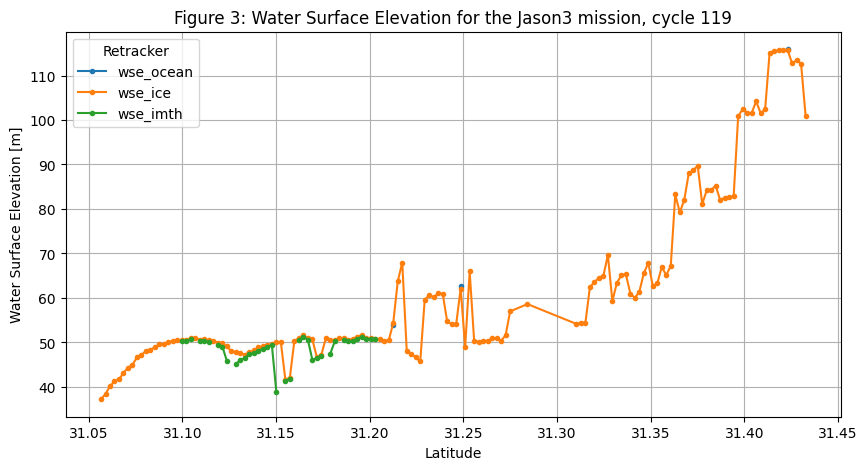

In [7]:
# Get the data for the Jason-2 mission, cycle 119
cycle_subset = data.query('mission == "jason3" & cycle_nr == 119')
cycle_subset.set_index('glat').sort_index()[['wse_ocean','wse_ice','wse_imth']].plot(marker='.', linestyle='-', figsize=(10, 5))
plt.title(f'Figure 3: Water Surface Elevation for the {cycle_subset.mission.iloc[0].title()} mission, cycle {cycle_subset.cycle_nr.iloc[0]}')
plt.legend(title='Retracker')
plt.xlabel('Latitude')
plt.ylabel('Water Surface Elevation [m]')
plt.grid()
plt.show()

Try different missions and cycles to see how the water surface elevation estimates of the different retracker vary over time.<br>
- **How do the retracker estimates compare to each other?**
- **What physical effects can you observe?**

#### 1.2 Water level time series

For validation and as reference, read the data from the insitu station:

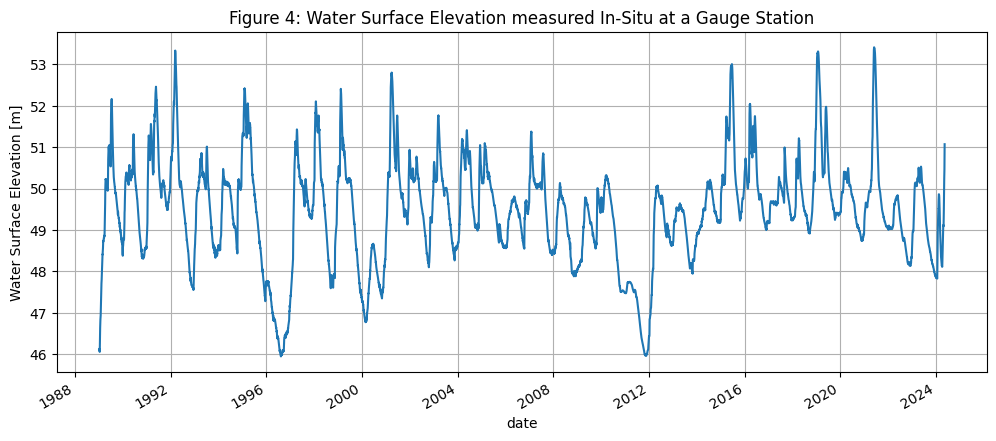

In [8]:
insitu_wse = pd.read_csv('data/SamRayburn/insitu_wse.csv', comment='#', names=['date','insitu_wse'], delimiter=' ', usecols=[0,1], parse_dates=['date'], index_col=0).insitu_wse
insitu_wse.plot(figsize=(12, 5))
plt.ylabel('Water Surface Elevation [m]')
plt.title('Figure 4: Water Surface Elevation measured In-Situ at a Gauge Station')
plt.grid()
plt.show()

We want to create such a time series from the satellite data.<br>
For this, we need to define oulier conditions and calculate a single water level estimate for each observed day.

The Results in Figure 3 contain a lot of NaN values or Outlier, because the retracker algorithms are not able to estimate the water surface elevation over land.<br>
Define latitude bounds to filter the data for valid measurements over the water body (cf. Figures 1, 2, and 3):

In [9]:
min_envisat_lat = 31.1875
max_envisat_lat = 31.2010

min_sentinel3_lat = 31.1967
max_sentinel3_lat = 31.21

min_jason_lat = 31.10
max_jason_lat = 31.11

Based on Figure 4, define thresholds for the water surface elevation estimates to filter out outliers:

In [10]:
max_wse = 53.5
min_wse = 46

We flag the data based on the given bounds:

In [11]:
data['outlier'] = True
data.loc[(data.mission == 'envisat') & (data.glat > min_envisat_lat) & (data.glat < max_envisat_lat) & (data.wse_imth > min_wse) & (data.wse_imth < max_wse) , 'outlier'] = False
data.loc[(data.mission == 'S3B') & (data.glat > min_sentinel3_lat) & (data.glat < max_sentinel3_lat) & (data.wse_imth > min_wse) & (data.wse_imth < max_wse), 'outlier'] = False
data.loc[(data.mission.isin(['jason2','jason3','sentinel6a'])) & (data.glat > min_jason_lat) & (data.glat < max_jason_lat) & (data.wse_imth > min_wse) & (data.wse_imth < max_wse), 'outlier'] = False

Plot all the data not flagged as outlier:

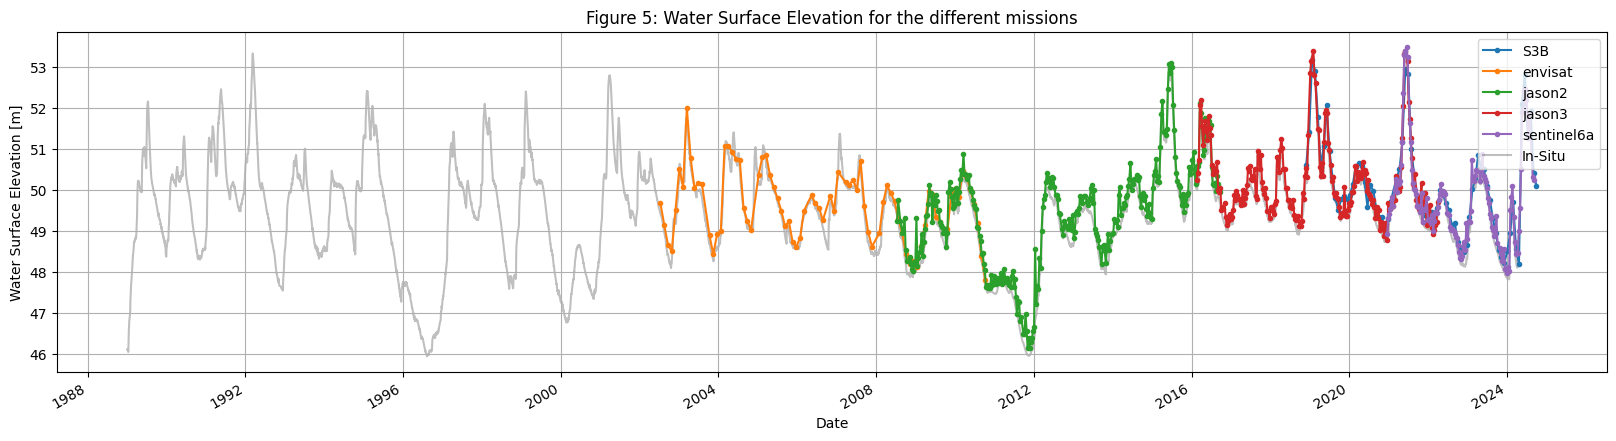

In [12]:
fig, ax = plt.subplots(figsize=(20, 5))
# The ~ operator inverts the boolean values in the Series so that we filter out all outliers
for mission, group in data[~data.outlier].groupby('mission'):
    # We calculate the median of the water surface elevation for each datetime
    # First, we set the index of the data to the datetime column
    # Then, we resample the data to daily (1D) values and calculate the daily median
    group.set_index('datetime').wse_imth.resample('1D').median().dropna().plot(ax=ax, marker='.', label=mission)
# We plot the in-situ data as reference
insitu_wse.plot(ax=ax, zorder=-1, label='In-Situ', color='black',alpha=0.25)
plt.legend()
plt.grid()
plt.ylabel('Water Surface Elevation [m]')
plt.xlabel('Date')
plt.title('Figure 5: Water Surface Elevation for the different missions')
plt.show()

- **How would you rate the resulting time series?**
- **What are the main sources of error in the water level estimates?**
- **How can we mitigate some remaining outliers?**

#### 1.3 Quality Assessment

Now, we will calculate the root mean square error (RMSE), Nash-Sutcliffe Efficiency (NSE), and Pearson's Correlation (R) between the satellite and insitu water level estimates to assess the quality of the satellite data.

Note, that there is still a **bias** between the satellite and insitu water level estimates visible in Figure 5.<br>
This is caused by the different vertical reference used by the insitu data.

We first need to remove this bias:

In [13]:
# Get the daily median water surface elevation timeseries from all missions combined
satellite_ts = data[~data.outlier].set_index('datetime').wse_imth.resample('1D').median().dropna()

# Calculate the constant bias between the satellite and in-situ data. The in-situ data is already sampled daily
bias = (satellite_ts - insitu_wse).median()
print(f'The bias between the satellite and in-situ data is {bias:.3f} meters')

# Remove the bias from the satellite data
satellite_ts = satellite_ts - bias

The bias between the satellite and in-situ data is 0.204 meters


Now create a function to calculate the RMSE between the satellite and insitu water level estimates:

The RMSE is calculated as:

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (p_i - t_i)^2}
$$

Where:
- $n$: Number of data points
- $p_i$: Predicted value at index $i$
- $t_i$: True value at index $i$

**Note:**
 - Remember how we calculated the bias in the previous step. You can use a similar notation but use the ```mean()``` instead of the ```median()```.
 - You can square a series using the ```**``` operator. For example, ```x**2``` squares the value of series x. You can also use ```x.pow(2)```.
 - We import the numpy module as np as you might need the ```np.sqrt(x)``` function

In [14]:
import numpy as np
def calc_rmse(predictions, truth):
    rmse = np.sqrt(((predictions - truth) ** 2).mean())
    return rmse

rmse = calc_rmse(satellite_ts, insitu_wse)
print(f'The RMSE between the satellite and in-situ data is {rmse:.3f} meters')
print('-----')
for mission, group in data[~data.outlier].groupby('mission'):
    mission_ts = group.set_index('datetime').wse_imth.resample('1D').median().dropna()
    mission_bias = (mission_ts - insitu_wse).median()
    mission_ts = mission_ts - bias
    mission_rmse = calc_rmse(mission_ts, insitu_wse)
    print(f'RMSE for {mission}: {mission_rmse:.3f} meters')

The RMSE between the satellite and in-situ data is 0.189 meters
-----
RMSE for S3B: 0.225 meters
RMSE for envisat: 0.111 meters
RMSE for jason2: 0.222 meters
RMSE for jason3: 0.186 meters
RMSE for sentinel6a: 0.171 meters


**Are the RMSE values as expected?**

Additionally, calculate the Nash-Sutcliffe Efficiency (NSE) between the satellite and insitu water level estimates:

The NSE is calculated as:

$$
\text{NSE} = 1 - \frac{\sum_{i=1}^{n} (p_i - t_i)^2}{\sum_{i=1}^{n} (t_i - \bar{t})^2}
$$

Where:
- $n$: Number of data points
- $p_i$: Predicted value at index $ i $
- $t_i$: Observed (true) value at index $ i $
- $\bar{t}$: Mean of the observed values

In [15]:
def calc_nse(predictions, truth):
    # We need to align the data for this calculation as the length of truth values must match the satellite values for a representative mean.
    # Aligning the data makes sure that both series have the same length and the same index. Data that is not present in both series is removed.
    truth, predictions = truth.align(predictions, join='inner')
    nse = 1 - (truth.sub(predictions).pow(2).sum() / truth.sub(truth.mean()).pow(2).sum())
    return nse

nse = calc_nse(satellite_ts, insitu_wse)
print(f'The NSE between the satellite and in-situ data is {nse:.3f}')

The NSE between the satellite and in-situ data is 0.973


Now calculate the Pearson's Correlation (R) between the satellite and insitu water level estimates:

The Pearson's Correlation is calculated as:

$$
\text{R} = \frac{covariance(p,t)}{std(p) \cdot std(t)}
$$

Note:
- The covariance between two series can be calculated using the ```series1.cov(series2)``` function.
- The standard deviation of a series can be calculated using the ```series.std()``` function.

In [16]:
def calc_corr(predictions, truth):
    # Again, the data must be aligned for this calculation
    truth, predictions = truth.align(predictions, join='inner')
    corr = predictions.cov(truth) / (predictions.std() * truth.std())
    return corr

corr = calc_corr(satellite_ts, insitu_wse)
print(f'The Pearson Correlation between the satellite and in-situ data is {corr:.3f}')

The Pearson Correlation between the satellite and in-situ data is 0.987


Let's compare the Quality with the [DAHITI timeseries](https://dahiti.dgfi.tum.de/en/10246/water-level-altimetry/):

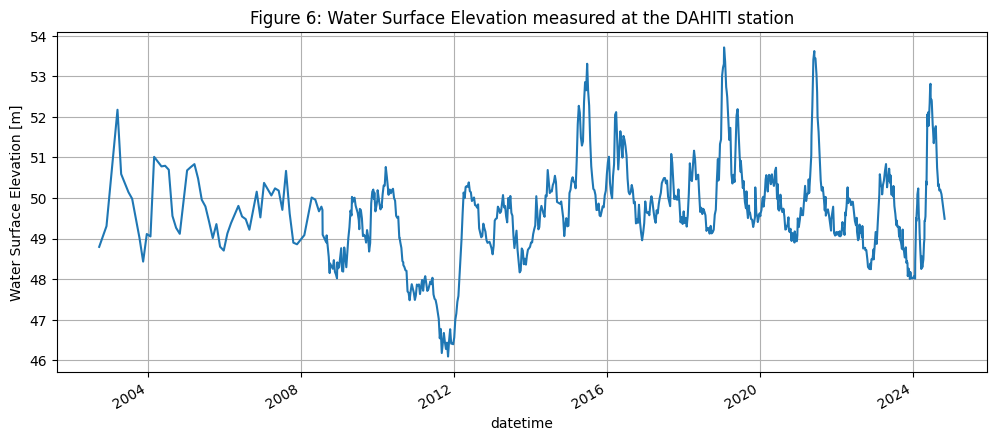

The bias between DAHITI and the in-situ data is 0.204 meters
The RMSE between DAHITI and the in-situ data is 0.184 meters
The NSE between DAHITI and the in-situ data is 0.975


In [17]:
dahiti_wse = pd.read_csv('data/SamRayburn/dahiti_wse.csv', comment='#', delimiter=';', usecols=[0,1], parse_dates=[0], index_col=0).water_level
dahiti_wse = dahiti_wse.resample('1D').median().dropna()
dahiti_wse.plot(figsize=(12, 5))
plt.ylabel('Water Surface Elevation [m]')
plt.title('Figure 6: Water Surface Elevation measured at the DAHITI station')
plt.grid()
plt.show()

dahiti_bias = (dahiti_wse - insitu_wse).median()
dahiti_wse = dahiti_wse - dahiti_bias
print(f'The bias between DAHITI and the in-situ data is {bias:.3f} meters')
rmse_dahiti = calc_rmse(dahiti_wse, insitu_wse)
print(f'The RMSE between DAHITI and the in-situ data is {rmse_dahiti:.3f} meters')
nse_dahiti = calc_nse(dahiti_wse, insitu_wse)
print(f'The NSE between DAHITI and the in-situ data is {nse_dahiti:.3f}')